In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Let's immport the 'googleplaystore.csv' dataset as well as the 'googleplaystore_user_reviews' one 
#and visualize the first 10 rows
df = pd.read_csv(r"C:\Users\Fabio\Desktop\Python\2023\Start2impact projects\Appstore apps\googleplaystore.csv")
df.head(10)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   
5     167  5.6M      50,000+  Free     0       Everyone   
6     178   19M      50,000+  Free     0       Everyone   
7   36815   29M   1,000,000+  Free     0       Everyone   
8   13791   33M   1,000,000+  Free     0       Everyone   
9     121  3.1M      10,000+  Free     0       Everyone   

                      Genres        Last Updated         Current Ver  \
0               Art & Design     January 7, 2018               1.0.0   
1  Art & Design;Pretend Play    January 15, 2018               2.0.0   
2               Art & Design      August 1, 2018               1.2.4   
3               Art & Design        June 8, 2018  Varies with device   
4    Art & Design;Creativity       June 20, 2018                 1.1   
5               Art & Design      March 26, 2017                 1.0   
6               Art & Design      April 26, 2018                 1.1   
7               Art & Design       June 14, 2018            6.1.61.1   
8               Art & Design  September 20, 2017               2.9.2   
9    Art & Design;Creativity        July 3, 2018                 2.8   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up  
5    2.3 and up  
6  4.0.3 and up  
7    4.2 and up  
8    3.0 and up  
9  4.0.3 and up

In [3]:
df_reviews = pd.read_csv(r"C:\Users\Fabio\Desktop\Python\2023\Start2impact projects\Appstore apps\googleplaystore_user_reviews.csv")
df_reviews.head(10)

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   
6  10 Best Foods for You                                            Amazing   
7  10 Best Foods for You                                                NaN   
8  10 Best Foods for You                               Looking forward app,   
9  10 Best Foods for You              It helpful site ! It help foods get !   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
5  Positive                1.00                0.300000  
6  Positive                0.60                0.900000  
7       NaN                 NaN                     NaN  
8   Neutral                0.00                0.000000  
9   Neutral                0.00                0.000000

In [4]:
df_reviews.shape

(64295, 5)

In [5]:
df_reviews['App'].nunique()

1074

In [6]:
#This second dataframe contains some information about each review and there are reviews for 1074 unique apps
#We'll consider whether to use this dataframe later, once we get more information about the df dataset

In [7]:
#How many rows and columns the df contains and what's the genereal information of this dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
#all these columns could be potentially used, with very few values null
#We'll have to transform some of these columns into a numeric data type to be able to make some analysis
#I have doubts the 'Current Ver' and 'Android Ver' columns can give me any insights
#let's see which unique values these two columns show
df['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
1.0.17.3905              1
15.1.2                   1
4.94.19                  1
1.1.11.11                1
2.0.148.0                1
Name: Current Ver, Length: 2832, dtype: int64

In [9]:
df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [10]:
#Looking at these results, I can confirm my above assumption: this data is not particularly useful for our purpose
#the first column is just telling us which version of each app is currently in the Store, the second that our app must be based on the current android versions
#These columns can be dropped from our dataframe
pd.set_option('display.max_rows', 10)
df = df.drop('Current Ver', axis = 1)
df = df.drop('Android Ver', axis = 1)
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  
0           Everyone               Art & Design   January 7, 2018  
1           Everyone  Art & Design;Pretend Play  January 15, 2018  
2           Everyone               Art & Design    August 1, 2018  
3               Teen               Art & Design      June 8, 2018  
4           Everyone    Art & Design;Creativity     June 20, 2018  
...              ...                        ...               ...  
10836       Everyone                  Education     July 25, 2017  
10837       Everyone                  Education      July 6, 2018  
10838       Everyone                    Medical  January 20, 2017  
10839     Mature 17+          Books & Reference  January 19, 2015  
10840       Everyone                  Lifestyle     July 25, 2018  

[10841 rows x 11 columns]

In [11]:
#Now let's look at how many null values there are for each column
pd.set_option('display.max_rows', 11)
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
dtype: int64

In [12]:
df[df['Rating'].isnull()]

App             Category  Rating  \
23                  Mcqueen Coloring pages       ART_AND_DESIGN     NaN   
113              Wrinkles and rejuvenation               BEAUTY     NaN   
123                 Manicure - nail design               BEAUTY     NaN   
126           Skin Care and Natural Beauty               BEAUTY     NaN   
129    Secrets of beauty, youth and health               BEAUTY     NaN   
...                                    ...                  ...     ...   
10824                            Cardio-FR              MEDICAL     NaN   
10825                   Naruto & Boruto FR               SOCIAL     NaN   
10831             payermonstationnement.fr  MAPS_AND_NAVIGATION     NaN   
10835                             FR Forms             BUSINESS     NaN   
10838               Parkinson Exercices FR              MEDICAL     NaN   

      Reviews  Size  Installs  Type Price Content Rating  \
23         61  7.0M  100,000+  Free     0       Everyone   
113       182  5.7M  100,000+  Free     0   Everyone 10+   
123       119  3.7M   50,000+  Free     0       Everyone   
126       654  7.4M  100,000+  Free     0           Teen   
129        77  2.9M   10,000+  Free     0     Mature 17+   
...       ...   ...       ...   ...   ...            ...   
10824      67   82M   10,000+  Free     0       Everyone   
10825       7  7.7M      100+  Free     0           Teen   
10831      38  9.8M    5,000+  Free     0       Everyone   
10835       0  9.6M       10+  Free     0       Everyone   
10838       3  9.5M    1,000+  Free     0       Everyone   

                                Genres        Last Updated  
23     Art & Design;Action & Adventure       March 7, 2018  
113                             Beauty  September 20, 2017  
123                             Beauty       July 23, 2018  
126                             Beauty       July 17, 2018  
129                             Beauty      August 8, 2017  
...                                ...                 ...  
10824                          Medical       July 31, 2018  
10825                           Social    February 2, 2018  
10831                Maps & Navigation       June 13, 2018  
10835                         Business  September 29, 2016  
10838                          Medical    January 20, 2017  

[1474 rows x 11 columns]

In [13]:
"""approximately ~10-15% of the apps don't have a rating, however they can still have reviews as shown
in the preview above and/or significant installations, so I decide to keep these rows in my dataset for now
as the rating of an app is not the only meaningful metric"""

"approximately ~10-15% of the apps don't have a rating, however they can still have reviews as shown\nin the preview above and/or significant installations, so I decide to keep these rows in my dataset for now\nas the rating of an app is not the only meaningful metric"

In [14]:
#let's just replace the null values with 0, assuming the null values simply mean the apps weren't rated
df['Rating'] = df['Rating'].fillna(0)

In [15]:
#let's change the format of the Installs column before it can be converted into numeric datatype
#I can see that it is currently formatted with the + at the end and with the comma for the thousands instead of '.'
df['Installs'] = df['Installs'].str.replace('+','', regex=True).str.replace(',','', regex=True)

In [16]:
#For the size, let's have a look if every value is formatted ending with M only
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [17]:
#some values are expressed in M and some in K, we need to take this into account when converting into numeric dtypes
#let's convert every value into Kilobytes
def convert_size(size):
    if size.endswith('M'):
        return float(size[:-1]) * 1000
    elif size.endswith('k'):
        return float(size[:-1])
    else:
        try:
            return float(size)
        except ValueError:
            return 0
# this last part of the code prevents the code from returning an error in case there are other values 
# that do not follow the M/k format like for instance 'Varies with device' cases
df['Size'] = df['Size'].apply(convert_size)

In [18]:
#let's check now whether the values in this column look correct as we expected
df.head(10)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews     Size  Installs  Type Price Content Rating  \
0     159  19000.0     10000  Free     0       Everyone   
1     967  14000.0    500000  Free     0       Everyone   
2   87510   8700.0   5000000  Free     0       Everyone   
3  215644  25000.0  50000000  Free     0           Teen   
4     967   2800.0    100000  Free     0       Everyone   
5     167   5600.0     50000  Free     0       Everyone   
6     178  19000.0     50000  Free     0       Everyone   
7   36815  29000.0   1000000  Free     0       Everyone   
8   13791  33000.0   1000000  Free     0       Everyone   
9     121   3100.0     10000  Free     0       Everyone   

                      Genres        Last Updated  
0               Art & Design     January 7, 2018  
1  Art & Design;Pretend Play    January 15, 2018  
2               Art & Design      August 1, 2018  
3               Art & Design        June 8, 2018  
4    Art & Design;Creativity       June 20, 2018  
5               Art & Design      March 26, 2017  
6               Art & Design      April 26, 2018  
7               Art & Design       June 14, 2018  
8               Art & Design  September 20, 2017  
9    Art & Design;Creativity        July 3, 2018

In [19]:
#We also want to convert the Price columnm so let's make sure as well this column is ready to be converted
pd.set_option('display.max_rows', None)
df['Price'].value_counts()

0           10040
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$29.99          7
$24.99          7
$3.49           7
$7.99           7
$5.49           6
$19.99          6
$11.99          5
$6.49           5
$12.99          5
$8.99           5
$10.00          3
$16.99          3
$1.00           3
$2.00           3
$13.99          2
$8.49           2
$17.99          2
$1.70           2
$3.95           2
$79.99          2
$7.49           2
$9.00           2
$10.99          2
$39.99          2
$33.99          2
$19.40          1
$3.90           1
$1.96           1
$4.60           1
$15.46          1
$3.04           1
$4.29           1
$2.60           1
$3.28           1
$4.80           1
$4.59           1
$3.08           1
$28.99          1
$2.95           1
$2.90           1
$1.97           1
$200.00   

In [20]:
#all the prices start with the $ sign in front, let's remove it
df['Price'] = df['Price'].str.replace('$','', regex=True)

In [21]:
numeric_columns = ['Reviews','Installs','Price','Rating']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

ValueError: Unable to parse string "3.0M" at position 10472

In [ ]:
#Since the above returns one error at position 10472, let's look at that specific row
df.iloc[10472]

In [22]:
#this row doesn't look right, it looks like some values got mixed up between the different columns
#since it's one row only, we can remove this one
df.drop(10472, inplace=True)

In [23]:
#Let's retry to convert these columns now
numeric_columns = ['Reviews','Installs','Price']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 1016.2+ KB


In [25]:
date_format = '%B %d, %Y'
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format= date_format)
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
6                Smoke Effect Photo Maker - Smoke Editor       ART_AND_DESIGN   
7                                       Infinite Painter       ART_AND_DESIGN   
8                                   Garden Coloring Book       ART_AND_DESIGN   
9                          Kids Paint Free - Drawing Fun       ART_AND_DESIGN   
10                               Text on Photo - Fonteee       ART_AND_DESIGN   
11               Name Art Photo Editor - Focus n Filters       ART_AND_DESIGN   
12                        Tattoo Name On My Photo Editor       ART_AND_DESIGN   
13                                 Mandala Coloring Book       ART_AND_DESIGN   
14       3D Color Pixel by Number - Sandbox Art Coloring       ART_AND_DESIGN   
15                       Learn To Draw Kawaii Characters       ART_AND_DESIGN   
16          Photo Designer - Write your name with shapes       ART_AND_DESIGN   
17                              350 Diy Room Decor Ideas       ART_AND_DESIGN   
18                         FlipaClip - Cartoon animation       ART_AND_DESIGN   
19                                          ibis Paint X       ART_AND_DESIGN   
20                           Logo Maker - Small Business       ART_AND_DESIGN   
21             Boys Photo Editor - Six Pack & Men's Suit       ART_AND_DESIGN   
22               Superheroes Wallpapers | 4K Backgrounds       ART_AND_DESIGN   
23                                Mcqueen Coloring pages       ART_AND_DESIGN   
24                           HD Mickey Minnie Wallpapers       ART_AND_DESIGN   
25                            Harley Quinn wallpapers HD       ART_AND_DESIGN   
26                         Colorfit - Drawing & Coloring       ART_AND_DESIGN   
27                                 Animated Photo Editor       ART_AND_DESIGN   
28                                 Pencil Sketch Drawing       ART_AND_DESIGN   
29                       Easy Realistic Drawing Tutorial       ART_AND_DESIGN   
30                        Pink Silver Bow Keyboard Theme       ART_AND_DESIGN   
31                                     Art Drawing Ideas       ART_AND_DESIGN   
32                             Anime Manga Coloring Book       ART_AND_DESIGN   
33                                    Easy Origami Ideas       ART_AND_DESIGN   
34                                       I Creative Idea       ART_AND_DESIGN   
35                      How to draw Ladybug and Cat Noir       ART_AND_DESIGN   
36        UNICORN - Color By Number & Pixel Art Coloring       ART_AND_DESIGN   
37                                    Floor Plan Creator       ART_AND_DESIGN   
38                        PIP Camera - PIP Collage Maker       ART_AND_DESIGN   
39         How To Color Disney Princess - Coloring Pages       ART_AND_DESIGN   
40                         Drawing Clothes Fashion Ideas       ART_AND_DESIGN   
41                          Sad Poetry Photo Frames 2018       ART_AND_DESIGN   
42                            Textgram - write on photos       ART_AND_DESIGN   
43                                         Paint Splash!       ART_AND_DESIGN   
44           Popsicle Sticks and Similar DIY Craft Ideas       ART_AND_DESIGN   
45     Canva: Poster, banner, card maker & graphic de...       ART_AND_DESIGN   
46     Install images with music to make video withou...       ART_AND_DESIGN   
47                 Little Teddy Bear Colouring Book Game       ART_AND_DESIGN   
48                                      How To Draw Food       ART_AND_DESIGN   
49 

In [26]:
#let's find out whether there are any duplicates in the Dataframe i.e. all the columns are exactly the same in multiple rows
duplicate_rows = df.duplicated()
duplicate_rows.sum()

483

In [27]:
#let's get rid of the 483 duplicate rows
df.drop_duplicates(inplace=True)

In [28]:
#The dataframe should now be quite cleaned according to our needs, so let's get to the analysis part
df.describe()

Rating       Reviews           Size      Installs         Price
count  10357.000000  1.035700e+04   10357.000000  1.035700e+04  10357.000000
mean       3.595501  4.059046e+05   18151.246355  1.415776e+07      1.030800
std        1.537651  2.696778e+06   22138.997773  8.023955e+07     16.278625
min        0.000000  0.000000e+00       0.000000  0.000000e+00      0.000000
25%        3.700000  3.200000e+01    2700.000000  1.000000e+03      0.000000
50%        4.200000  1.680000e+03    9100.000000  1.000000e+05      0.000000
75%        4.500000  4.641600e+04   26000.000000  1.000000e+06      0.000000
max        5.000000  7.815831e+07  100000.000000  1.000000e+09    400.000000

In [29]:
#Ops, there are quite some large numbers here; better to convert the reviews and installs columns into thousands (k)
#let's also rename the columns to make it clear

In [30]:
thousands = ['Reviews', 'Installs']
df[thousands] = df[thousands]/1000
df = df.rename(columns={'Reviews':'Reviews (in k)', 'Installs':'Installs (in k)'})

In [31]:
#Let's round also the numeric columns to the second decimal only
numeric_columns = ['Reviews (in k)', 'Size', 'Installs (in k)','Price']
df[numeric_columns] = df[numeric_columns].round(2)

In [32]:
df.dtypes

App                        object
Category                   object
Rating                    float64
Reviews (in k)            float64
Size                      float64
Installs (in k)           float64
Type                       object
Price                     float64
Content Rating             object
Genres                     object
Last Updated       datetime64[ns]
dtype: object

In [33]:
df.describe()

Rating  Reviews (in k)           Size  Installs (in k)  \
count  10357.000000    10357.000000   10357.000000     10357.000000   
mean       3.595501      405.904466   18151.246355     14157.759395   
std        1.537651     2696.777931   22138.997773     80239.553877   
min        0.000000        0.000000       0.000000         0.000000   
25%        3.700000        0.030000    2700.000000         1.000000   
50%        4.200000        1.680000    9100.000000       100.000000   
75%        4.500000       46.420000   26000.000000      1000.000000   
max        5.000000    78158.310000  100000.000000   1000000.000000   

              Price  
count  10357.000000  
mean       1.030800  
std       16.278625  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      400.000000

In [34]:
#Based on these simple summary statistics, we can infer that the population is right skewed, with the mean larger than the median value for all parameters
#a few points to start thinking about:
#- half of the apps have got only up to 1.7k of reviews, while the mean value is 405k, which is much higher, 
#with only 25% of the apps that got more than 46k reviews (third quartile), so the mean is highly influeced by outlier apps
#- we don't care much about the size, at least for now
#- the installations tell a similar story as for the reviews
#- at least 75% of the apps are free, being the third quartile equal to zero
#- 75% of apps are rated higher than 3.7, which seems a fairly good rating


<AxesSubplot:xlabel='Reviews (in k)', ylabel='Count'>

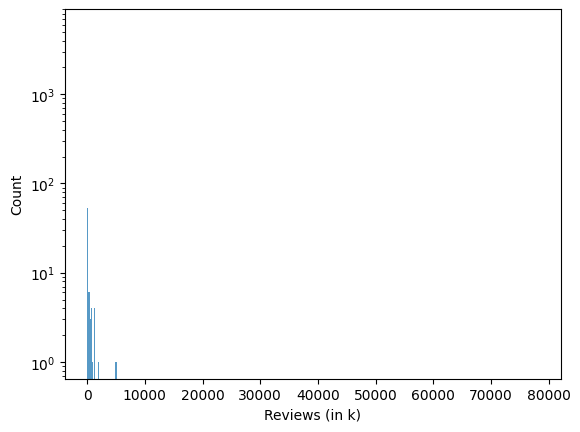

In [35]:
#let's try to plot these distributions
reviews = df['Reviews (in k)']
sns.histplot(data=df, x=reviews, log_scale=(False, True))

In [ ]:
installs = df['Installs (in k)']
sns.histplot(data=df, x=installs, log_scale=(False, True))

In [ ]:
price = df['Price']
sns.displot(price, binwidth=1)

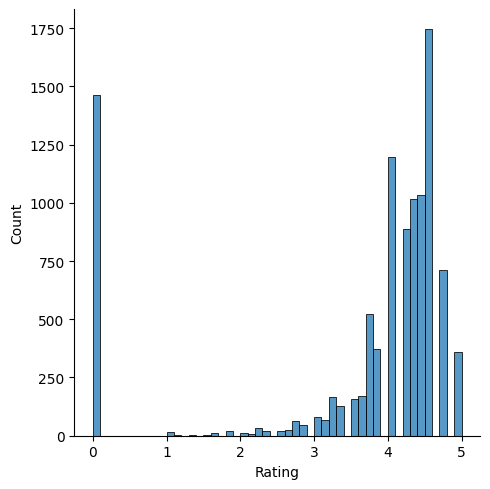

In [68]:
rating = df['Rating']
sns.displot(rating, binwidth=0.1)

In [36]:
#These visualizations confirm what we were noticing earlier, the data is highly skewed by outliers
# I now want to check whether these outliers make sense - if I filter for those Apps with more than 10M reviews for instance
# I am expecting to see well known apps as 10M reviews is definitely a lot of reviews!
pd.set_option('display.max_rows', None)
df[df['Reviews (in k)'] > 10000].sort_values('Reviews (in k)',ascending=False)

App            Category  \
2544                                           Facebook              SOCIAL   
3943                                           Facebook              SOCIAL   
336                                  WhatsApp Messenger       COMMUNICATION   
3904                                 WhatsApp Messenger       COMMUNICATION   
2604                                          Instagram              SOCIAL   
2545                                          Instagram              SOCIAL   
3909                                          Instagram              SOCIAL   
382            Messenger – Text and Video Chat for Free       COMMUNICATION   
335            Messenger – Text and Video Chat for Free       COMMUNICATION   
1879                                     Clash of Clans                GAME   
1670                                     Clash of Clans                GAME   
3986                                     Clash of Clans              FAMILY   
4005            Clean Master- Space Cleaner & Antivirus               TOOLS   
1872                                     Subway Surfers                GAME   
1750                                     Subway Surfers                GAME   
1700                                     Subway Surfers                GAME   
1654                                     Subway Surfers                GAME   
3896                                     Subway Surfers                GAME   
3665                                            YouTube       VIDEO_PLAYERS   
3928                                            YouTube       VIDEO_PLAYERS   
7536  Security Master - Antivirus, VPN, AppLock, Boo...               TOOLS   
1878                                       Clash Royale                GAME   
1721                                       Clash Royale                GAME   
1660                                       Clash Royale                GAME   
3987                                       Clash Royale              FAMILY   
1869                                   Candy Crush Saga                GAME   
1842                                   Candy Crush Saga                GAME   
1705                                   Candy Crush Saga                GAME   
1655                                   Candy Crush Saga                GAME   
3994                                   Candy Crush Saga              FAMILY   
420         UC Browser - Fast Download Private & Secure       COMMUNICATION   
378         UC Browser - Fast Download Private & Secure       COMMUNICATION   
2610                                           Snapchat              SOCIAL   
2550                                           Snapchat              SOCIAL   
2603                                           Snapchat              SOCIAL   
3870                                           Snapchat              SOCIAL   
4568    360 Security - Free Antivirus, Booster, Cleaner               TOOLS   
1908                                     My Talking Tom                GAME   
1722                                     My Talking Tom                GAME   
3888                                     My Talking Tom              FAMILY   
1871                                        8 Ball Pool                GAME   
1970                                        8 Ball Pool                GAME   
1844                                        8 Ball Pool                GAME   
1755                                        8 Ball Pool                GAME   
1703                                        8 Ball Pool                GAME   
1675                                        8 Ball Pool                GAME   
3953                                        8 Ball Pool              SPORTS   
8896  DU Battery Saver - Battery Charger & Battery Life               TOOLS   
6449                        BBM - Free Calls & Messages       COMMUNICATION   
406                         BBM - Free Calls & Messages       COMMUNICATION   
8894  Cache Cleaner-DU 

In [37]:
#More or less all the apps seem to justify these big numbers of reviews; we have the main social medias, communication apps
# and very popular games
#let's filter also by installs, expecting more or less the same apps (and we can see this already in the above dataframe)
#an high number of reviews should be well linked to an high number of installations
#Let's filter for 100M installs


In [38]:
df[df['Installs (in k)'] > 100000].sort_values('Installs (in k)',ascending=False)

App             Category  \
152                                   Google Play Books  BOOKS_AND_REFERENCE   
3127                                 Google Street View     TRAVEL_AND_LOCAL   
3523                                       Google Drive         PRODUCTIVITY   
3454                                       Google Drive         PRODUCTIVITY   
335            Messenger – Text and Video Chat for Free        COMMUNICATION   
3234                                             Google                TOOLS   
3232                                 Google Street View     TRAVEL_AND_LOCAL   
3223                          Maps - Navigate & Explore     TRAVEL_AND_LOCAL   
3117                          Maps - Navigate & Explore     TRAVEL_AND_LOCAL   
1872                                     Subway Surfers                 GAME   
2884                                      Google Photos          PHOTOGRAPHY   
2853                                      Google Photos          PHOTOGRAPHY   
2808                                      Google Photos          PHOTOGRAPHY   
2604                                          Instagram               SOCIAL   
2554                                            Google+               SOCIAL   
2545                                          Instagram               SOCIAL   
3665                                            YouTube        VIDEO_PLAYERS   
3687                            Google Play Movies & TV        VIDEO_PLAYERS   
3736                                        Google News   NEWS_AND_MAGAZINES   
3816                                        Google News   NEWS_AND_MAGAZINES   
3896                                     Subway Surfers                 GAME   
3904                                 WhatsApp Messenger        COMMUNICATION   
3909                                          Instagram               SOCIAL   
3928                                            YouTube        VIDEO_PLAYERS   
3943                                           Facebook               SOCIAL   
3996                       Google Chrome: Fast & Secure        COMMUNICATION   
4098                          Maps - Navigate & Explore     TRAVEL_AND_LOCAL   
4144                                            Google+               SOCIAL   
4150                                             Google                TOOLS   
4153                                           Hangouts        COMMUNICATION   
4170                                       Google Drive         PRODUCTIVITY   
5395                                      Google Photos          PHOTOGRAPHY   
5856                                  Google Play Games               FAMILY   
2544                                           Facebook               SOCIAL   
9844                                        Google News   NEWS_AND_MAGAZINES   
865                                   Google Play Games        ENTERTAINMENT   
391                       Skype - free IM & video calls        COMMUNICATION   
382            Messenger – Text and Video Chat for Free        COMMUNICATION   
1654                                     Subway Surfers                 GAME   
464                                            Hangouts        COMMUNICATION   
1700                                     Subway Surfers                 GAME   
386                                            Hangouts        COMMUNICATION   
341                                            Hangouts        COMMUNICATION   
340                                               Gmail        COMMUNICATION   
451                                               Gmail        COMMUNICATION   
1750                                     Subway Surfers                 GAME   
338                        Google Chrome: Fast & Secure        COMMUNICATION   
411                        Google Chrome: Fast & Secure        COMMUNICATION   
336                                  WhatsApp Messenger        COMMUNICATION   
3888                                     My Talking 

In [39]:
#This list makes sense as well!
#One observation is that there are plenty of Google apps; in fact, this is the Google Play Store!
#They have an obvious advantage - we might want to take this into account later

#However, what I noticed in these dataframes is that there are many apps for which there's more than one row
#These are still duplicates; I can see they were not removed in my prior duplicates cleaning because they slightly differ
#mainly in the reviews numbers, but it's clear they are essentially duplicates
#let's see how many of these duplicates we have for the overall dataframe and let's get rid of these as well
duplicate_apps = df.duplicated(['App'])
duplicate_apps.sum()

698

In [40]:
df.drop_duplicates(['App'], inplace=True)
#this is the updated dataframe, ordered by installs, to check that the most popular apps don't show anymore duplicates
df[df['Installs (in k)'] > 100000].sort_values('Installs (in k)',ascending=False)

App             Category  \
152                                   Google Play Books  BOOKS_AND_REFERENCE   
1654                                     Subway Surfers                 GAME   
3736                                        Google News   NEWS_AND_MAGAZINES   
3687                            Google Play Movies & TV        VIDEO_PLAYERS   
3665                                            YouTube        VIDEO_PLAYERS   
3454                                       Google Drive         PRODUCTIVITY   
3234                                             Google                TOOLS   
3127                                 Google Street View     TRAVEL_AND_LOCAL   
3117                          Maps - Navigate & Explore     TRAVEL_AND_LOCAL   
2808                                      Google Photos          PHOTOGRAPHY   
335            Messenger – Text and Video Chat for Free        COMMUNICATION   
2545                                          Instagram               SOCIAL   
2544                                           Facebook               SOCIAL   
2554                                            Google+               SOCIAL   
865                                   Google Play Games        ENTERTAINMENT   
336                                  WhatsApp Messenger        COMMUNICATION   
391                       Skype - free IM & video calls        COMMUNICATION   
338                        Google Chrome: Fast & Secure        COMMUNICATION   
340                                               Gmail        COMMUNICATION   
341                                            Hangouts        COMMUNICATION   
1655                                   Candy Crush Saga                 GAME   
3450                                     Microsoft Word         PRODUCTIVITY   
5596                                     Samsung Health   HEALTH_AND_FITNESS   
4005            Clean Master- Space Cleaner & Antivirus                TOOLS   
3755                       Flipboard: News For Our Time   NEWS_AND_MAGAZINES   
3739                                            Twitter   NEWS_AND_MAGAZINES   
3703                                          MX Player        VIDEO_PLAYERS   
3574                                        Cloud Print         PRODUCTIVITY   
3476                                    Google Calendar         PRODUCTIVITY   
3473                                            Dropbox         PRODUCTIVITY   
3265                       Gboard - the Google Keyboard                TOOLS   
1661                                       Temple Run 2                 GAME   
3255                         SHAREit - Transfer & Share                TOOLS   
3235                                   Google Translate                TOOLS   
342                                     Viber Messenger        COMMUNICATION   
347                       imo free video calls and chat        COMMUNICATION   
371               Google Duo - High Quality Video Calls        COMMUNICATION   
378         UC Browser - Fast Download Private & Secure        COMMUNICATION   
2550                                           Snapchat               SOCIAL   
2546                                      Facebook Lite               SOCIAL   
403                         LINE: Free Calls & Messages        COMMUNICATION   
1722                                     My Talking Tom                 GAME   
1662                                                Pou                 GAME   
7536  Security Master - Antivirus, VPN, AppLock, Boo...                TOOLS   

      Rating  Reviews (in k)     Size  Installs (in k)  Type  Price  \
152      3.9         1433.23      0.0        1000000.0  Free    0.0   
1654     4.5        27722.26  76000.0        1000000.0  Free    0.0   
3736     3.9          877.64  13000.0        1000000.0  Free    0.0   
3687     3.7          906.38      0.0        1000000.0  Free    0.0   
3665     4.3        25655.30      0.0        1000000.0  Free    0.0   
3454     4.4         2731

In [41]:
df.describe()

Rating  Reviews (in k)           Size  Installs (in k)  \
count  9659.000000     9659.000000    9659.000000      9659.000000   
mean      3.541143      216.592415   17804.439331      7777.506683   
std       1.575733     1831.319622   21495.244177     53758.278691   
min       0.000000        0.000000       0.000000         0.000000   
25%       3.600000        0.020000    2900.000000         1.000000   
50%       4.200000        0.970000    9100.000000       100.000000   
75%       4.500000       29.405000   25000.000000      1000.000000   
max       5.000000    78158.310000  100000.000000   1000000.000000   

             Price  
count  9659.000000  
mean      1.099299  
std      16.852152  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max     400.000000

In [42]:
#our high level stats are as a result correcting, even though they continue to tell the same story
#now we can also say that the n. of unique apps in the dataset is 9659;
#This is much higher than the n. of apps for which we have any review in the reviews dataset (we found 1074 unique apps)
#For this reason, I decided not to work with the other datset for this project, considering the limited available data

In [43]:
#let's look also at the correlations of these numeric variables
df.corr()

C:\Users\Fabio\AppData\Local\Temp\ipykernel_24236\1177219270.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Rating  Reviews (in k)      Size  Installs (in k)     Price
Rating           1.000000        0.064703  0.099892         0.070582 -0.014319
Reviews (in k)   0.064703        1.000000  0.037879         0.625165 -0.007598
Size             0.099892        0.037879  1.000000        -0.007477 -0.015053
Installs (in k)  0.070582        0.625165 -0.007477         1.000000 -0.009405
Price           -0.014319       -0.007598 -0.015053        -0.009405  1.000000

In [44]:
#The only clear correlation that we can see is between number of installations and number of reviews
#it seems logical that installs and reviews metrics go hand in hand, larger installs numbers are likely combined with more reviews and viceversa
#the others show numbers close to zero, i.e. no correlation

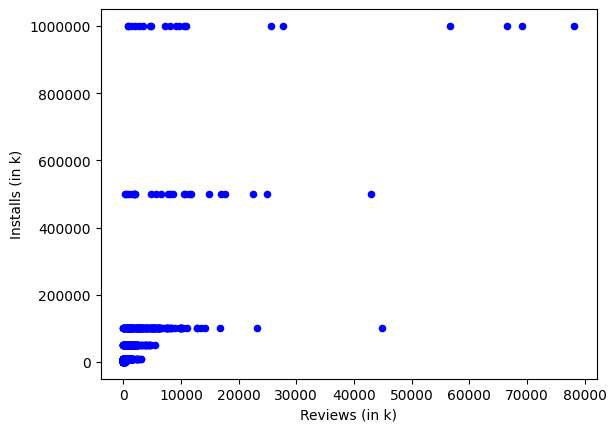

In [45]:
ax1 = df.plot.scatter(x='Reviews (in k)', y='Installs (in k)', c='blue')
ax1.ticklabel_format(style='plain', axis='y')
plt.show()

In [46]:
#the representation of the correlation between reviews and installs graphically is not very straightforward because
#the two have quite different magnitudes of numbers (there can't be more reviews than installations and most of the times
#installs greatly outnumber the reviews)

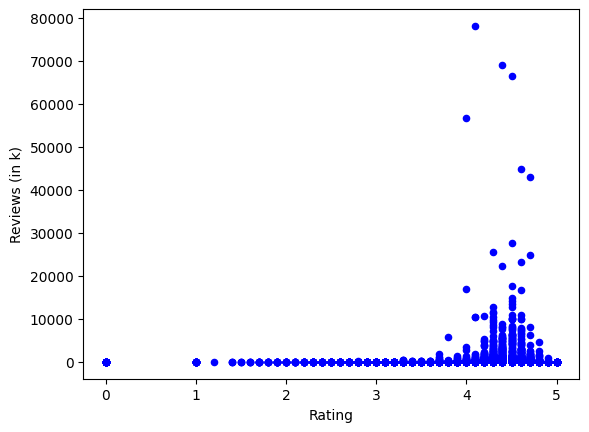

In [47]:
ax2 = df.plot.scatter(x='Rating', y='Reviews (in k)', c='blue')

In [48]:
#this one is visually more straightforward (despite the positive correlation being much lower)
#and shows that apps with a large number of reviews have in most cases a rating above 4
#but a good rating doesn't imply in many cases an high number of reviews

In [49]:
#Now, one decision that we will have to make as app developer is whether to release the app free of charge or as a paid one
#I assume that all the other metrics are influenced by this decision in some way:
# - Reviews: I expect a lower absolute number of reviews for paid apps (on average) as less people are disposed to pay for an app
# - Rating: I also expect the rating to be stricter (lower) than free apps as people have higher expectations when they need
#to pay for something
# - Installs: similar to the n. of reviews, I expect lower absolute installs for paid apps
# - Price: the higher the price, the less people are keen to install (and therefore pay) for an app

In [50]:
#let's create a new dataframe for paid apps only and analyse these ones separately
paid_apps = df[~(df['Price'] == 0)]

In [51]:
#I want to create a new column that gives me the total value of sales for each app
paid_apps.loc[:,'Revenue (in k)'] = paid_apps['Installs (in k)'] * paid_apps['Price']

C:\Users\Fabio\AppData\Local\Temp\ipykernel_24236\2784478127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_apps.loc[:,'Revenue (in k)'] = paid_apps['Installs (in k)'] * paid_apps['Price']


In [52]:
pd.set_option('display.max_rows', 10)
paid_apps

App            Category  \
234    TurboScan: scan documents and receipts in PDF            BUSINESS   
235                   Tiny Scanner Pro: PDF Doc Scan            BUSINESS   
427                               Puffin Browser Pro       COMMUNICATION   
476                        Moco+ - Chat, Meet People              DATING   
477                                       Calculator              DATING   
...                                              ...                 ...   
10735                                    FP VoiceBot              FAMILY   
10760                                Fast Tract Diet  HEALTH_AND_FITNESS   
10782                        Trine 2: Complete Story                GAME   
10785                                   sugar, sugar              FAMILY   
10798                           Word Search Tab 1 FR              FAMILY   

       Rating  Reviews (in k)     Size  Installs (in k)  Type  Price  \
234       4.7           11.44   6800.0           100.00  Paid   4.99   
235       4.8           10.30  39000.0           100.00  Paid   4.99   
427       4.0           18.25      0.0           100.00  Paid   3.99   
476       4.2            1.54      0.0            10.00  Paid   3.99   
477       2.6            0.06   6200.0             1.00  Paid   6.99   
...       ...             ...      ...              ...   ...    ...   
10735     0.0            0.02    157.0             0.10  Paid   0.99   
10760     4.4            0.04   2400.0             1.00  Paid   7.99   
10782     3.8            0.25  11000.0            10.00  Paid  16.99   
10785     4.2            1.40   9500.0            10.00  Paid   1.20   
10798     0.0            0.00   1020.0             0.05  Paid   1.04   

      Content Rating            Genres Last Updated  Revenue (in k)  
234         Everyone          Business   2018-03-25         499.000  
235         Everyone          Business   2017-04-11         499.000  
427         Everyone     Communication   2018-07-05         399.000  
476       Mature 17+            Dating   2018-06-19          39.900  
477         Everyone            Dating   2017-10-25           6.990  
...              ...               ...          ...             ...  
10735     Mature 17+     Entertainment   2015-11-25           0.099  
10760       Everyone  Health & Fitness   2018-08-08           7.990  
10782           Teen            Action   2015-02-27         169.900  
10785       Everyone            Puzzle   2018-06-05          12.000  
10798       Everyone            Puzzle   2012-02-06           0.052  

[756 rows x 12 columns]

In [53]:
paid_apps.describe()

Rating  Reviews (in k)           Size  Installs (in k)       Price  \
count  756.000000      756.000000     756.000000       756.000000  756.000000   
mean     3.403175        8.724550   17226.984127        75.879365   14.045146   
std      1.780130       89.885971   21832.456532       538.984413   58.743615   
min      0.000000        0.000000       0.000000         0.000000    0.990000   
25%      3.300000        0.010000    1800.000000         0.100000    1.490000   
50%      4.300000        0.090000    7350.000000         1.000000    2.990000   
75%      4.600000        1.212500   25000.000000        10.000000    4.990000   
max      5.000000     2376.560000  100000.000000     10000.000000  400.000000   

       Revenue (in k)  
count      756.000000  
mean       385.116298  
std       3095.535291  
min          0.000000  
25%          0.299000  
50%          4.990000  
75%         49.900000  
max      69900.000000

In [54]:
#The above assumptions on the metrics were correct; the additional insight is on how much we can expect to make just
#based on the app purchases, which is again rightly skewed and influenced by outliers
#half of the apps don't sell more than 5k USD, however this represents only the app price and not how much
#could be made from in app purchases or advertising on the apps for instance, which can be done both for free and paid apps
#we don't have this second data available, but we can assume that the higher the installs the higher would be the potential income
#as well as the higher the rating, the more we can expect people to use our app (which also should increase our income potential)


In [55]:
#I also want to check the correlation and how it changes compared to the whole dataset
paid_apps.corr()

C:\Users\Fabio\AppData\Local\Temp\ipykernel_24236\2641867389.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  paid_apps.corr()


Rating  Reviews (in k)      Size  Installs (in k)  \
Rating           1.000000        0.059399  0.117111         0.084540   
Reviews (in k)   0.059399        1.000000  0.015002         0.807545   
Size             0.117111        0.015002  1.000000         0.060911   
Installs (in k)  0.084540        0.807545  0.060911         1.000000   
Price           -0.027957       -0.014404 -0.048055        -0.021525   
Revenue (in k)   0.061922        0.834727 -0.021817         0.672686   

                    Price  Revenue (in k)  
Rating          -0.027957        0.061922  
Reviews (in k)  -0.014404        0.834727  
Size            -0.048055       -0.021817  
Installs (in k) -0.021525        0.672686  
Price            1.000000        0.228689  
Revenue (in k)   0.228689        1.000000

In [56]:
#the correlations don't vary significantly from the ones shown above; these are the differences:
#- there's an higher correlation between installations and reviews - I can imagine that someone that pays for an app is
#more likely to leave a review, good or bad that it is
#- a bit surprisingly, there's almost no correlation between price and installs - I would have imagined some negative corr
#- quite expectedly, apps with higher installs and/or reviews are correlated with the revenue they generated

In [57]:
#let's also have a look to which categories these apps are related to and the content rating
#Let's look at the data in both absolute terms (total n. of apps) and relative terms as a percentage of the whole population
print(paid_apps['Category'].value_counts())
paid_category_share = (paid_apps['Category'].value_counts()/len(paid_apps['Category'])*100)
print('\n')
print(round(paid_category_share,2))

FAMILY                183
MEDICAL                83
GAME                   82
PERSONALIZATION        81
TOOLS                  78
                     ... 
NEWS_AND_MAGAZINES      2
SHOPPING                2
PARENTING               2
LIBRARIES_AND_DEMO      1
EVENTS                  1
Name: Category, Length: 30, dtype: int64


FAMILY                24.21
MEDICAL               10.98
GAME                  10.85
PERSONALIZATION       10.71
TOOLS                 10.32
                      ...  
NEWS_AND_MAGAZINES     0.26
SHOPPING               0.26
PARENTING              0.26
LIBRARIES_AND_DEMO     0.13
EVENTS                 0.13
Name: Category, Length: 30, dtype: float64


In [58]:
#let's also visually display the apps by category since there are many different categories
#as they are too much, let's show only the first 10 and include the difference in an 'Other' category
top_categories = paid_category_share[:10]
other_categories = paid_category_share[10:].sum()
top_categories['Other'] = other_categories

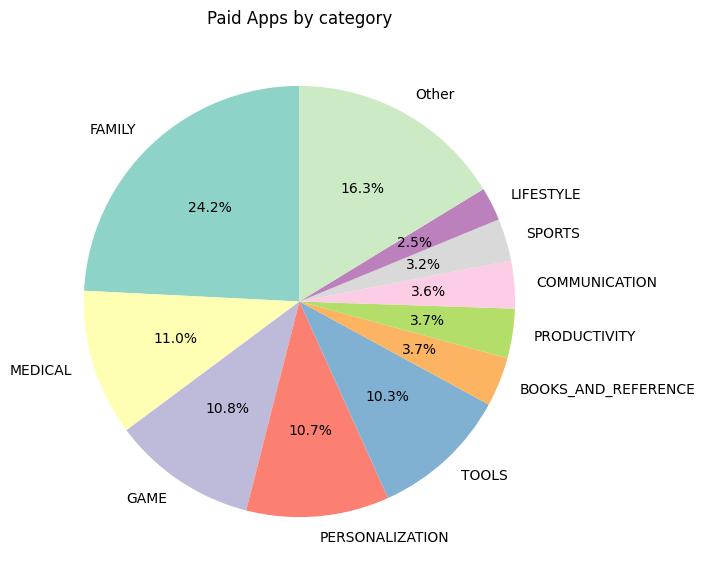

In [59]:
plt.figure(figsize=(7, 7))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Paid Apps by category')
    
plt.show()

In [60]:
#The genres column seems a subset of the category one, let's look at these two together
pd.set_option('display.max_rows', None)
paid_apps.groupby(['Category','Genres']).size()

Category             Genres                         
ART_AND_DESIGN       Art & Design                        3
AUTO_AND_VEHICLES    Auto & Vehicles                     3
BOOKS_AND_REFERENCE  Books & Reference                  28
BUSINESS             Business                           12
COMMUNICATION        Communication                      27
DATING               Dating                              6
EDUCATION            Education;Education                 1
                     Education;Pretend Play              3
ENTERTAINMENT        Entertainment                       2
EVENTS               Events                              1
FAMILY               Action;Action & Adventure           3
                     Adventure;Action & Adventure        2
                     Adventure;Brain Games               1
                     Arcade;Action & Adventure           3
                     Board;Action & Adventure            1
                     Board;Brain Games                   7
   

In [61]:
#Two of the most popular categories are split into genres (Game, Family), which can further segment the topic of the app
#This can be useful information to look at if we decide to develop an app in one of those categories

In [62]:
#let's look at the share of paid apps by content rating
paid_content_rating_share = (paid_apps['Content Rating'].value_counts()/len(paid_apps['Content Rating'])*100)
print('\n')
print(round(paid_content_rating_share,2))



Everyone        86.64
Teen             6.88
Everyone 10+     4.10
Mature 17+       2.38
Name: Content Rating, dtype: float64


In [63]:
#let's have still some further analysis on the top quartile apps by revenue - these could give us some additional insights
paid_apps[paid_apps['Revenue (in k)'] > 49.9].describe()

Rating  Reviews (in k)           Size  Installs (in k)       Price  \
count  199.000000      199.000000     199.000000       199.000000  199.000000   
mean     4.360302       32.497588   22553.442211       281.110553   33.151709   
std      0.434825      173.308753   24795.926100      1024.795189   99.208612   
min      0.000000        0.010000       0.000000         1.000000    0.990000   
25%      4.200000        1.645000    2500.000000        50.000000    2.990000   
50%      4.400000        5.970000   14000.000000       100.000000    4.490000   
75%      4.600000       19.375000   36000.000000       100.000000    6.990000   
max      4.900000     2376.560000  100000.000000     10000.000000  400.000000   

       Revenue (in k)  
count      199.000000  
mean      1443.280352  
std       5917.005183  
min         49.900000  
25%        149.500000  
50%        299.000000  
75%        990.000000  
max      69900.000000

In [64]:
#The top paid apps have higher ratings, reviews and (obviously) installs
#are there any categories that are particularly popular in this sample? any specific content rating that sticks out?
top_apps = paid_apps[paid_apps['Revenue (in k)']> 49.9]['Category']

print(round((top_apps.value_counts()/len(top_apps))*100,2))
print('\n')

top_apps_rating = paid_apps[paid_apps['Revenue (in k)']> 49.9]['Content Rating']
print(round((top_apps_rating.value_counts()/len(top_apps_rating))*100,2))


FAMILY                 29.65
GAME                   21.11
MEDICAL                 7.54
PERSONALIZATION         5.03
TOOLS                   4.52
FINANCE                 4.02
LIFESTYLE               3.52
HEALTH_AND_FITNESS      3.52
PHOTOGRAPHY             3.52
PRODUCTIVITY            3.52
SPORTS                  2.51
COMMUNICATION           2.51
WEATHER                 2.01
TRAVEL_AND_LOCAL        1.51
BUSINESS                1.01
ENTERTAINMENT           1.01
EDUCATION               1.01
FOOD_AND_DRINK          0.50
AUTO_AND_VEHICLES       0.50
PARENTING               0.50
MAPS_AND_NAVIGATION     0.50
VIDEO_PLAYERS           0.50
Name: Category, dtype: float64


Everyone        74.37
Teen            14.57
Everyone 10+     8.54
Mature 17+       2.51
Name: Content Rating, dtype: float64


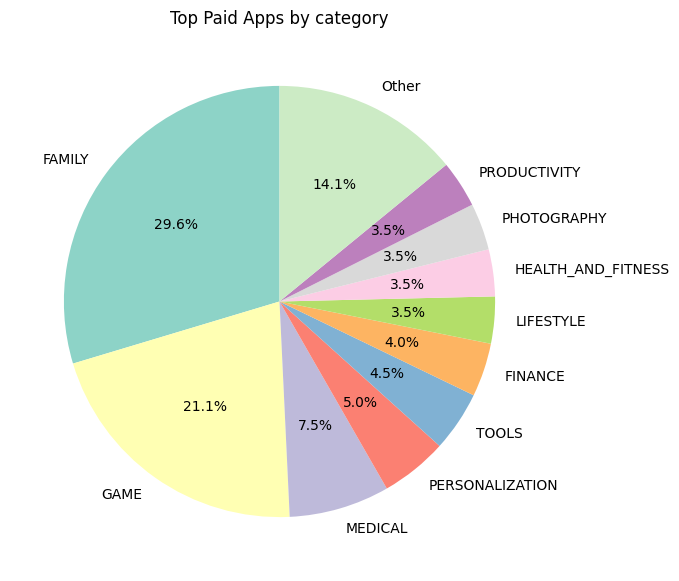

In [65]:
#let's plot again a pie chart to show the categories distribution and compare it to the previous one
#the content rating is more straightforward so I won't plot it
top_categories = top_apps.value_counts()[:10]
other_categories = top_apps.value_counts()[10:].sum()
top_categories['Other'] = other_categories

plt.figure(figsize=(7, 7))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Top Paid Apps by category')
    
plt.show()

In [66]:
#The above tells us that there are clearly some specific categories, mainly the first two, for which paid apps are likely to be successful
#and where users seem to me be more keen to spend some money - maybe for lack of good free alternatives or they are more inclined 
#to allocate resources for some use cases
#Both in absolute terms and in relative terms (for the total paid apps and top paid apps) Family, Game and Medical categories are the most popular ones 

#The content rating shows a majority of apps for everyone as very popular, but proportionally (compared to the total
#paid apps with the same content rating), apps for Teens and "everyone above 10" are more successful

In [67]:
#if we want to aim for the stars, let's have an idea of the characteristics of the top 10 apps by revenue
paid_apps.sort_values('Revenue (in k)', ascending=False).head(10)

App     Category  Rating  Reviews (in k)  \
2241                      Minecraft       FAMILY     4.5         2376.56   
5351                      I am rich    LIFESTYLE     3.8            3.55   
5356              I Am Rich Premium      FINANCE     4.1            1.87   
4034                  Hitman Sniper         GAME     4.6          408.29   
7417  Grand Theft Auto: San Andreas         GAME     4.4          348.96   
2883            Facetune - For Free  PHOTOGRAPHY     4.4           49.55   
5578        Sleep as Android Unlock    LIFESTYLE     4.5           23.97   
8804            DraStic DS Emulator         GAME     4.6           87.77   
4367       I'm Rich - Trump Edition    LIFESTYLE     3.6            0.28   
5354                 I am Rich Plus       FAMILY     4.0            0.86   

         Size  Installs (in k)  Type   Price Content Rating  \
2241      0.0          10000.0  Paid    6.99   Everyone 10+   
5351   1800.0            100.0  Paid  399.99       Everyone   
5356   4700.0             50.0  Paid  399.99       Everyone   
4034  29000.0          10000.0  Paid    0.99     Mature 17+   
7417  26000.0           1000.0  Paid    6.99     Mature 17+   
2883  48000.0           1000.0  Paid    5.99       Everyone   
5578    872.0           1000.0  Paid    5.99       Everyone   
8804  12000.0           1000.0  Paid    4.99       Everyone   
4367   7300.0             10.0  Paid  400.00       Everyone   
5354   8700.0             10.0  Paid  399.99       Everyone   

                         Genres Last Updated  Revenue (in k)  
2241  Arcade;Action & Adventure   2018-07-24         69900.0  
5351                  Lifestyle   2018-01-12         39999.0  
5356                    Finance   2017-11-12         19999.5  
4034                     Action   2018-07-12          9900.0  
7417                     Action   2015-03-21          6990.0  
2883                Photography   2018-07-25          5990.0  
5578                  Lifestyle   2018-06-27          5990.0  
8804                     Action   2016-07-19          4990.0  
4367                  Lifestyle   2018-05-03          4000.0  
5354              Entertainment   2018-05-19          3999.9

In [68]:
#In summary:
#- 4 of the 10 apps have a very high price but enough installs and they all refer to being rich (we'll maybe have to test one of these apps to see what's behind)
#- there are some well known videogames (most likely became popular on other platforms first) - I played to San Andreas on PS2!
#- this is in general one of the most popular categories for the top 25% apps that we saw earlier

In [69]:
#now let's move to the free apps and create a new dataset
pd.set_option('display.max_rows', 10)
free_apps = df[df['Price'] == 0]
free_apps

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews (in k)     Size  Installs (in k)  Type  Price  \
0         4.1            0.16  19000.0             10.0  Free    0.0   
1         3.9            0.97  14000.0            500.0  Free    0.0   
2         4.7           87.51   8700.0           5000.0  Free    0.0   
3         4.5          215.64  25000.0          50000.0  Free    0.0   
4         4.3            0.97   2800.0            100.0  Free    0.0   
...       ...             ...      ...              ...   ...    ...   
10836     4.5            0.04  53000.0              5.0  Free    0.0   
10837     5.0            0.00   3600.0              0.1  Free    0.0   
10838     0.0            0.00   9500.0              1.0  Free    0.0   
10839     4.5            0.11      0.0              1.0  Free    0.0   
10840     4.5          398.31  19000.0          10000.0  Free    0.0   

      Content Rating                     Genres Last Updated  
0           Everyone               Art & Design   2018-01-07  
1           Everyone  Art & Design;Pretend Play   2018-01-15  
2           Everyone               Art & Design   2018-08-01  
3               Teen               Art & Design   2018-06-08  
4           Everyone    Art & Design;Creativity   2018-06-20  
...              ...                        ...          ...  
10836       Everyone                  Education   2017-07-25  
10837       Everyone                  Education   2018-07-06  
10838       Everyone                    Medical   2017-01-20  
10839     Mature 17+          Books & Reference   2015-01-19  
10840       Everyone                  Lifestyle   2018-07-25  

[8903 rows x 11 columns]

In [70]:
free_apps.describe()

Rating  Reviews (in k)           Size  Installs (in k)   Price
count  8903.000000     8903.000000    8903.000000      8903.000000  8903.0
mean      3.552859      234.243556   17853.474054      8431.491885     0.0
std       1.556690     1906.273845   21466.894033     55945.431307     0.0
min       0.000000        0.000000       0.000000         0.000000     0.0
25%       3.600000        0.030000    3000.000000         1.000000     0.0
50%       4.200000        1.370000    9200.000000       100.000000     0.0
75%       4.500000       35.180000   25000.000000      1000.000000     0.0
max       5.000000    78158.310000  100000.000000   1000000.000000     0.0

In [71]:
free_apps.corr()

C:\Users\Fabio\AppData\Local\Temp\ipykernel_24236\4184315237.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  free_apps.corr()


Rating  Reviews (in k)      Size  Installs (in k)  Price
Rating           1.000000        0.067100  0.098075         0.073279    NaN
Reviews (in k)   0.067100        1.000000  0.039201         0.624700    NaN
Size             0.098075        0.039201  1.000000        -0.008197    NaN
Installs (in k)  0.073279        0.624700 -0.008197         1.000000    NaN
Price                 NaN             NaN       NaN              NaN    NaN

In [72]:
#we don't see big differences compared to the stats of the whole dataframe (as this also makes up the majority of the dataframe)
#so let's move on with more in detail analysis

In [73]:
print(free_apps['Category'].value_counts())
print('\nIn percentages: ')
free_category_share = (free_apps['Category'].value_counts()/len(free_apps['Category'])*100)
print(round(free_category_share,2))


FAMILY            1649
GAME               877
TOOLS              749
BUSINESS           408
LIFESTYLE          350
                  ... 
EVENTS              63
ART_AND_DESIGN      61
PARENTING           58
COMICS              56
BEAUTY              53
Name: Category, Length: 33, dtype: int64

In percentages: 
FAMILY            18.52
GAME               9.85
TOOLS              8.41
BUSINESS           4.58
LIFESTYLE          3.93
                  ...  
EVENTS             0.71
ART_AND_DESIGN     0.69
PARENTING          0.65
COMICS             0.63
BEAUTY             0.60
Name: Category, Length: 33, dtype: float64


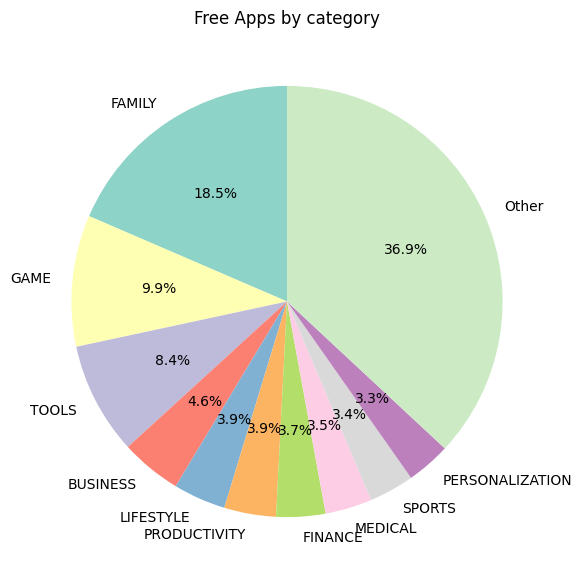

In [74]:
free_categories = free_category_share[:10]
other_categories = free_category_share[10:].sum()
free_categories['Other'] = other_categories

plt.figure(figsize=(7, 7))
plt.pie(free_categories, labels=free_categories.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Free Apps by category')
    
plt.show()

In [75]:
print(free_apps['Content Rating'].value_counts())
print('\nIn percentage: ')
free_rating_share = (free_apps['Content Rating'].value_counts()/len(free_apps['Content Rating'])*100)
print(round(free_rating_share,2))


Everyone           7248
Teen                984
Mature 17+          375
Everyone 10+        291
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In percentage: 
Everyone           81.41
Teen               11.05
Mature 17+          4.21
Everyone 10+        3.27
Adults only 18+     0.03
Unrated             0.02
Name: Content Rating, dtype: float64


In [76]:
pd.set_option('display.max_rows', None)
free_apps.groupby(['Category','Genres']).size().sort_values(ascending=False)

Category             Genres                               
TOOLS                Tools                                    748
FAMILY               Entertainment                            452
BUSINESS             Business                                 408
FAMILY               Education                                381
LIFESTYLE            Lifestyle                                349
PRODUCTIVITY         Productivity                             346
FINANCE              Finance                                  328
MEDICAL              Medical                                  312
SPORTS               Sports                                   301
PERSONALIZATION      Personalization                          295
COMMUNICATION        Communication                            288
GAME                 Action                                   275
HEALTH_AND_FITNESS   Health & Fitness                         273
PHOTOGRAPHY          Photography                              262
NEWS_AND_MAGAZINE

In [77]:
#as for the paid apps, there are clearly some popular categories, even though there are less dominant categories
#and apps that target everyone are the most popular

In [78]:
#Unlike for paid apps, we cannot use as a metric how much sales these apps had, but we can still look at the n. of installs
#reviews and at the rating
#we already know from before that the top apps by installs and reviews are dominated by social and communication apps as
#well as very popular free games: the competition in these spaces is very fierce, plus the apps market in general is quite
#a mature one already

#while users are very open to try new games for instance, they are less keen to change social media or communication app
#for their network effects (e.g. I use Whatsapp because everyone else is using it to communicate)
#therefore I would exclude those categories from our opportunities

In [79]:
free_apps.shape

(8903, 11)

In [80]:
free_apps = free_apps[~(free_apps['Category'] == 'SOCIAL') & ~(free_apps['Category'] == 'COMMUNICATION')]

In [81]:
free_apps.shape

(8379, 11)

In [82]:
#we can see that our list of free apps is reducing...
#since this is the google app store, it's notorious Google would favor its own app in all the categories where it's competing
#plus, some of their apps are already preinstalled in all Android phones, which is the dominating mobile phone operating system
#my recommendation is not to compete in these categories as well, actually we should be using the genres columns,
#as some categories have different genres where Google might not offer any specific app


In [83]:
pd.set_option('display.max_rows', None)
google_genres = free_apps[free_apps['App'].str.contains('Google')]
google_genres

App             Category  \
152                                   Google Play Books  BOOKS_AND_REFERENCE   
193                                  Google My Business             BUSINESS   
198                                       Google Primer             BUSINESS   
238                                          Google Ads             BUSINESS   
249                                    Google Analytics             BUSINESS   
791                                    Google Classroom            EDUCATION   
865                                   Google Play Games        ENTERTAINMENT   
1083                                         Google Pay              FINANCE   
1317                      Google Fit - Fitness Tracking   HEALTH_AND_FITNESS   
2808                                      Google Photos          PHOTOGRAPHY   
2855  QuickPic - Photo Gallery with Google Drive Sup...          PHOTOGRAPHY   
3114                      Google Trips - Travel Planner     TRAVEL_AND_LOCAL   
3121                                       Google Earth     TRAVEL_AND_LOCAL   
3127                                 Google Street View     TRAVEL_AND_LOCAL   
3234                                             Google                TOOLS   
3235                                   Google Translate                TOOLS   
3257    Files Go by Google: Free up space on your phone                TOOLS   
3265                       Gboard - the Google Keyboard                TOOLS   
3266                                Google Korean Input                TOOLS   
3268                          Google app for Android TV                TOOLS   
3275                                Google Assistant Go                TOOLS   
3330                           Google Handwriting Input                TOOLS   
3454                                       Google Drive         PRODUCTIVITY   
3458                                  Google PDF Viewer         PRODUCTIVITY   
3462                                   Google Assistant         PRODUCTIVITY   
3467                                        Google Keep         PRODUCTIVITY   
3476                                    Google Calendar         PRODUCTIVITY   
3477                                        Google Docs         PRODUCTIVITY   
3526                                      Google Sheets         PRODUCTIVITY   
3534                                      Google Slides         PRODUCTIVITY   
3687                            Google Play Movies & TV        VIDEO_PLAYERS   
3736                                        Google News   NEWS_AND_MAGAZINES   
4151                                Google Now Launcher                TOOLS   
4436                                    Google I/O 2018  BOOKS_AND_REFERENCE   
4965                                     Google AdSense         PRODUCTIVITY   
4969                       Local Services ads by Google             BUSINESS   
5073                         PhotoScan by Google Photos          PHOTOGRAPHY   
6995                                One Today by Google            LIFESTYLE   
7012                               Project Fi by Google                TOOLS   
8353                         Fix Error Google Playstore  BOOKS_AND_REFERENCE   
8659                     Cal - Google Calendar + Widget         PRODUCTIVITY   
9838                              Google Arts & Culture               FAMILY   

      Rating  Reviews (in k)     Size  Installs (in k)  Type  Price  \
152      3.9         1433.23      0.0        1000000.0  Free    0.0   
193      4.4           70.99      0.0           5000.0  Free    0.0   
198      4.4           62.27  18000.0          10000.0  Free    0.0   
238      4.3           29.31  20000.0           5000.0  Free    0.0   
249      4.5           78.66  22000.0           1000.0  Free    0.0   
791      4.2           69.49      0.0          10000.0  Free    0.0   
865      4.3         7165.36      0.0        1000000.0  Free    0.0   
1083     4.2          347.84      0.0      

In [84]:
#Actually I notice there are some Google apps where Google was not successful (based on the number of installs or from the rating)
#Let's keep this into account rather than simply excluding every Genre where we see the Google name
#We will exclude only those Genres where Google has an app with a rating at least = 4.0 and where the number of Installs
#has surpassed 100M (but it could be any other threshold that we consider significant)

In [85]:
google_genres = free_apps[(free_apps['App'].str.contains('Google'))&(free_apps['Rating']>=4.0)&(free_apps['Installs (in k)']>=100000)]['Genres'].unique()
print(google_genres)

['Entertainment' 'Finance' 'Photography' 'Travel & Local' 'Tools'
 'Productivity']


In [86]:
free_apps = free_apps[~free_apps['Genres'].isin(google_genres)]
free_apps.shape

(5947, 11)

In [87]:
#this has significantly decreased the number of apps, but now we can focus on where there can be more opportunities!
free_apps.describe()

Rating  Reviews (in k)           Size  Installs (in k)   Price
count  5947.000000     5947.000000    5947.000000      5947.000000  5947.0
mean      3.560972      182.824537   20877.176307      5674.720331     0.0
std       1.577573     1164.839736   23206.251812     36939.262129     0.0
min       0.000000        0.000000       0.000000         0.000000     0.0
25%       3.700000        0.030000    3900.000000         1.000000     0.0
50%       4.200000        1.480000   12000.000000       100.000000     0.0
75%       4.500000       33.050000   30000.000000      1000.000000     0.0
max       5.000000    44891.720000  100000.000000   1000000.000000     0.0

In [88]:
#let's filter this subset of apps to see how many we have for each category and genre and what's their average rating
#This can give us direction to the size of each segment and where there are still potential opportunities based on the average rating

#let's exclude first all the apps that are not rated
free_apps[free_apps['Rating'] == 0]['Rating'].count()

900

In [89]:
#let's create a copy of free_apps where we exclude all the free apps with a rating equal to zero
free_apps2 = free_apps[~(free_apps['Rating'] == 0)]

In [90]:
#on this data, let's group by category and genre; I want to see how many apps there are for each combination and their median rating
opportunity_apps = free_apps2.groupby(['Category','Genres'])['Rating'].agg(['count', 'median'])

In [91]:
print(opportunity_apps)

                                                           count  median
Category            Genres                                              
ART_AND_DESIGN      Art & Design                              52    4.40
                    Art & Design;Creativity                    5    4.70
                    Art & Design;Pretend Play                  1    3.90
AUTO_AND_VEHICLES   Auto & Vehicles                           72    4.30
BEAUTY              Beauty                                    42    4.30
BOOKS_AND_REFERENCE Books & Reference                        161    4.50
BUSINESS            Business                                 254    4.25
COMICS              Comics                                    53    4.40
                    Comics;Creativity                          1    4.80
DATING              Dating                                   131    4.10
EDUCATION           Education                                 98    4.30
                    Education;Action & Adventure   

In [92]:
free_apps2.describe()

Rating  Reviews (in k)           Size  Installs (in k)   Price
count  5047.000000     5047.000000    5047.000000      5047.000000  5047.0
mean      4.195978      215.422146   22166.572122      6685.951680     0.0
std       0.517327     1261.679669   24240.648410     40014.037864     0.0
min       1.000000        0.000000       0.000000         0.000000     0.0
25%       4.000000        0.160000    3900.000000        10.000000     0.0
50%       4.300000        3.960000   13000.000000       500.000000     0.0
75%       4.500000       50.040000   33000.000000      1000.000000     0.0
max       5.000000    44891.720000  100000.000000   1000000.000000     0.0

In [93]:
#we could now segment more into these genres based on the rating:
#- apps with a rating below 4.3 out of 5.0 - there is room to develop a better app taking into account the lower reviews
#- 4.3 is the median rating - 50% of the apps are below this target and 50% above
#- We should probably privilege genres where there is a considerable number of apps as some genres may be really small niches

opportunity_apps[(opportunity_apps['median'] < 4.3)].sort_values(by='median',ascending=False)

count  median
Category            Genres                                              
FAMILY              Board;Brain Games                          8    4.25
                    Simulation;Action & Adventure              6    4.25
GAME                Trivia                                    28    4.25
BUSINESS            Business                                 254    4.25
FAMILY              Action;Action & Adventure                  6    4.25
                    Educational;Pretend Play                   8    4.25
                    Casual;Education                           2    4.25
                    Entertainment;Brain Games                  5    4.20
                    Entertainment;Music & Video                8    4.20
MAPS_AND_NAVIGATION Maps & Navigation                        113    4.20
FAMILY              Role Playing;Pretend Play                  4    4.20
                    Simulation                               169    4.20
                    Educational;Action & Adventure             3    4.20
                    Strategy                                  62    4.20
GAME                Adventure                                 59    4.20
                    Card                                      38    4.20
                    Casual;Pretend Play                        1    4.20
                    Music                                     17    4.20
                    Racing                                    84    4.20
HOUSE_AND_HOME      House & Home                              62    4.20
FAMILY              Entertainment;Action & Adventure           3    4.20
LIBRARIES_AND_DEMO  Libraries & Demo                          64    4.20
LIFESTYLE           Lifestyle                                282    4.20
VIDEO_PLAYERS       Video Players & Editors                  143    4.20
EDUCATION           Education;Music & Video                    1    4.20
FAMILY              Education;Action & Adventure               2    4.20
                    Communication;Creativity                   1    4.20
EDUCATION           Education;Pretend Play                     1    4.20
ENTERTAINMENT       Entertainment;Music & Video                7    4.20
NEWS_AND_MAGAZINES  News & Magazines                         202    4.20
FAMILY              Casual;Pretend Play                       20    4.15
DATING              Dating                                   131    4.10
FAMILY              Adventure;Education                        1    4.10
GAME                Casual;Creativity                          1    4.10
FAMILY              Video Players & Editors;Creativity         1    4.10
TRAVEL_AND_LOCAL    Travel & Local;Action & Adventure          1    4.10
FAMILY              Casual                                   127    4.10
                    Casual;Music & Video                       1    4.10
                    Education;Music & Video                    2    4.10
                    Board;Action & Adventure                   2    4.05
                    Education;Pretend Play                     4    4.05
LIFESTYLE           Lifestyle;Pretend Play                     1    4.00
FAMILY              Entertainment;Pretend Play                 2    4.00
VIDEO_PLAYERS       Video Players & Editors;Music & Video      1    4.00
FAMILY              Video Players & Editors;Music & Video      1    4.00
                    Educational                               30    4.00
                    Health & Fitness;Action & Adventure        1    3.90
PARENTING           Parenting;Education                        3    3.90
FAMILY              Art & Design;Creativity                    1    3.90
ART_AND_DESIGN      Art & Design;Pretend Play                  1    3.90
PARENTING           Parenting;Brain Games                      1    3.80
FAMILY              Books & Reference;Education                1    3.70

In [ ]:
'''
Final considerations:

Before recommending any strategy it was very important to clean up the dataset and perform some basic analysis to get 
a first understanding.
It's also important to know the general context of the market that we are analysing:
Application stores were first set up around 2008 with the emerging technology of smartphones. From this period
the market has grown dramatically and nowadays almost everyone has a smartphone and several apps into it for the most
disparate purposes. Therefore, we are currently in a very mature and saturated market, where there is an abudance of apps
The application platforms owners themselves (mainly Google and Apple) have as well their own suite of apps to serve
all the main general needs and many of these come already as pre-installed when we buy the smartphone

The apps business model is driven by the number of installs, but also the n. of reviews and ratings are critical for 
their future growth (through installations from other users and updated to improve the apps based on feedback).
An app developer can earn from an app mainly in 3 ways:
- through paid apps, for which the customer pays a certain amount to be able to download the app
- in free apps, by advertising third party apps/services etc. that users get to see when they use the app 
  or for instance through in app purchases as it's common within games apps
- a mix of the two above

I decided to analyse paid apps and free apps as this represents one of the main decisions that an app developer must take.

Paid apps
They represent less than 10% of the apps in the dataset. Since they are not free of charge, they are overall less installed
and reviewed and they are rated generally lower. 50% of the apps has less than 1000 installs and nets less than 5000 USD.
If we rely just on the price of the app to make money out of it, we must be at least in the top 25% app where we can expect to
earn at least 50k USD. Half of these apps are related to 'Family' or 'Game' categories only and the majority of apps
targets everyone. 
The top 10 apps by revenue are mainly either well known games that were developed on other platforms, for which a mobile version
was created or they refer in their name to wealth and/or richness, which could be interpreted as either 'status' apps
or apps that target aspiring wealthy people (we might want to analyse further these apps and whether they could be replicated).
On the gaming ones, an idea could be to franchise some well known videogame brands not yet available on smartphones.

Free apps
There are about 9000 free apps in the dataset excluding duplicates and similarly to paid apps, this subset is rightly skewed with the mean
reviews and installs numbers well above their median number.
If we look at the top 10 categories by number of apps, we continue to see Family and Game apps as the most popular but they are
dominant than for paid apps. Apps that target everyone are also here the most common.

Looking at the top downloaded and reviewed apps, we can see all the widespread apps, including the main social media and 
communication apps.
I have decided to exclude completely those categories as those are areas where it's very difficult to compete and where 
users are less prone to try alternatives because of the huge network effects of some of these apps.
I have also considered Google, the company that owns the Play Store, as a main threat, as users that would look for a specific
genre of app, would obviously see a Google app in the first results if Google is offering any such app.
I am aware that not all their apps have Google in the name, but I needed a fast way to exclude the main ones considering it's
a larga dataset. Therefore I have removed from the dataset all the genres where Google has a successful app.

With the remaining dataset, that still considers ~5000 apps of the original ~9000 free apps, I have decided to focus
on the median rating by genre and I would think to develop an app where the rating is lower, which means that the users are less 
satisfied and more prone to try new apps.
We can look in the same table, how many apps are classified for each genre, which can give us an idea of the market size
or go for more niche areas with less competition if we see some unsatifsfied needs.
We don't have any financial data on free apps unlike for paid apps, but it's obvious that high installs and great reviews
will determine the success of the app. For this reason, I would still focus on where there is enough competition based on the
number of apps per genre and maybe the average/median number of installations.
Also, genres like for instance 'Business', 'Lifestyle' or 'Education' are wide enough to still likely present some opportunities.


Lastly, for free and paid apps, it's important to rely on my skills and drilldown on specific categories where I have some ideas
to see whether something similar exists already and how much competition there is already.
Data can help me make decisions but I can't just count on data to develop my app!


'''